In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
import torchvision.transforms as transforms
import torch.optim as optim
import PIL
import time
import copy
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
!rm -rf /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh/images

In [304]:
%cd /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh
!mkdir images
%cd /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh
!cp /content/drive/My\ Drive/Tesis_Resources/corpus/Video.mp4 . #Video.mp4 .

import cv2
import argparse
from sys import platform

vidcap = cv2.VideoCapture('Video.mp4') # Video.mp4

success,image = vidcap.read()
count = 0

while success:
  cv2.imwrite("/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/images/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  count += 1
#  if count >=1 :
#   success = False

frames = vidcap.get(cv2.CAP_PROP_POS_FRAMES)
segundos = vidcap.get(cv2.CAP_PROP_POS_MSEC) / 1000
frames_segundos = round(frames/segundos)

print(frames)
print(segundos)
print(frames_segundos)

/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh
/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh
862.0
35.95258333333333
24


In [0]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (117 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 131183 files and directories currently installe

In [3]:
#%cd /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh
#!git clone https://github.com/leoxiaobin/deep-high-resolution-net.pytorch.git
os.environ["POSE_ROOT"] = "/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/"
os.chdir(os.environ["POSE_ROOT"])
!pwd

/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch


In [4]:
!pip install -r requirements.txt

In [44]:
os.chdir(os.environ["POSE_ROOT"] + "/lib")
!make

cd nms; python setup_linux.py build_ext --inplace; rm -rf build; cd ../../
running build_ext
skipping 'cpu_nms.c' Cython extension (up-to-date)
skipping 'gpu_nms.cpp' Cython extension (up-to-date)


In [0]:
%cd /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh
!git clone https://github.com/cocodataset/cocoapi.git
%cd /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh/cocoapi/PythonAPI
# Install into global site-packages
!make install
# Alternatively, if you do not have permissions or prefer
# not to install the COCO API into global site-packages
!python3 setup.py install --user

In [0]:
os.chdir(os.environ["POSE_ROOT"])
!mkdir output 
!mkdir log
os.chdir(os.environ["POSE_ROOT"] + "/models")
!tree

mkdir: cannot create directory ‘output’: File exists
mkdir: cannot create directory ‘log’: File exists
.
└── pytorch
    ├── imagenet
    │   ├── hrnet_w32-36af842e.pth
    │   ├── hrnet_w48-8ef0771d.pth
    │   ├── resnet101-5d3b4d8f.pth
    │   ├── resnet152-b121ed2d.pth
    │   └── resnet50-19c8e357.pth
    ├── pose_coco
    │   ├── pose_hrnet_w32_256x192.pth
    │   ├── pose_hrnet_w32_384x288.pth
    │   ├── pose_hrnet_w48_256x192.pth
    │   ├── pose_hrnet_w48_384x288.pth
    │   ├── pose_resnet_101_256x192.pth
    │   ├── pose_resnet_101_384x288.pth
    │   ├── pose_resnet_152_256x192.pth
    │   ├── pose_resnet_152_384x288.pth
    │   ├── pose_resnet_50_256x192.pth
    │   └── pose_resnet_50_384x288.pth
    └── pose_mpii
        ├── pose_hrnet_w32_256x256.pth
        ├── pose_resnet_101_256x256.pth
        ├── pose_resnet_152_256x256.pth
        └── pose_resnet_50_256x256.pth

4 directories, 19 files


In [0]:
os.chdir(os.environ["POSE_ROOT"])
!mkdir data
os.chdir(os.environ["POSE_ROOT"] + "/data")
!mkdir mpii
!mkdir coco
!tree

In [0]:
%cd /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh/
#!mkdir coco2017
#%cd coco2017
#!wget http://images.cocodataset.org/zips/train2017.zip
#!wget http://images.cocodataset.org/zips/test2017.zip
#!wget http://images.cocodataset.org/zips/val2017.zip
#!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip


/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh
/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/coco2017


In [0]:
#!unzip train2017.zip -d /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/data/coco/images/
#!unzip test2017.zip -d /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/data/coco/images/
#!unzip val2017.zip -d /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/data/coco/images/


In [0]:
%cd /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh/coco2017
!unzip annotations_trainval2017.zip -d /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/data/coco/
%cd /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/data/coco/annotations
!ls

/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/coco2017
Archive:  annotations_trainval2017.zip
  inflating: /content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/data/coco/annotations/instances_train2017.json  
  inflating: /content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/data/coco/annotations/instances_val2017.json  
  inflating: /content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/data/coco/annotations/captions_train2017.json  
  inflating: /content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/data/coco/annotations/captions_val2017.json  
  inflating: /content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/data/coco/annotations/person_keypoints_train2017.json  
  inflating: /content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resol

In [46]:
os.chdir(os.environ["POSE_ROOT"])
!pwd
!python tools/test.py \
    --cfg experiments/coco/hrnet/w32_256x192_adam_lr1e-3.yaml \
    TEST.MODEL_FILE models/pytorch/pose_coco/pose_hrnet_w32_256x192.pth \
    TEST.USE_GT_BBOX False \
    GPUS "(0, )"

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-09716021ac45>", line 1, in <module>
    os.chdir(os.environ["POSE_ROOT"])
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _f

FileNotFoundError: ignored

In [0]:
os.chdir(os.environ["POSE_ROOT"])
!pwd
!python tools/test.py \
    --cfg experiments/coco/hrnet/w48_384x288_adam_lr1e-3.yaml \
    TEST.MODEL_FILE models/pytorch/pose_coco/pose_hrnet_w48_384x288.pth \
    TEST.USE_GT_BBOX False \
    GPUS "(0, )"

/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch
=> creating output/coco/pose_hrnet/w48_384x288_adam_lr1e-3
=> creating log/coco/pose_hrnet/w48_384x288_adam_lr1e-3_2019-10-14-03-46
Namespace(cfg='experiments/coco/hrnet/w48_384x288_adam_lr1e-3.yaml', dataDir='', logDir='', modelDir='', opts=['TEST.MODEL_FILE', 'models/pytorch/pose_coco/pose_hrnet_w48_384x288.pth', 'TEST.USE_GT_BBOX', 'False', 'GPUS', '(0, )'], prevModelDir='')
AUTO_RESUME: True
CUDNN:
  BENCHMARK: True
  DETERMINISTIC: False
  ENABLED: True
DATASET:
  COLOR_RGB: True
  DATASET: coco
  DATA_FORMAT: jpg
  FLIP: True
  HYBRID_JOINTS_TYPE: 
  NUM_JOINTS_HALF_BODY: 8
  PROB_HALF_BODY: 0.3
  ROOT: data/coco/
  ROT_FACTOR: 45
  SCALE_FACTOR: 0.35
  SELECT_DATA: False
  TEST_SET: val2017
  TRAIN_SET: train2017
DATA_DIR: 
DEBUG:
  DEBUG: True
  SAVE_BATCH_IMAGES_GT: True
  SAVE_BATCH_IMAGES_PRED: True
  SAVE_HEATMAPS_GT: True
  SAVE_HEATMAPS_PRED: True
GPUS: (0,)
LOG_DIR: log
LOSS:

In [169]:
from yaml import load, dump
from collections import namedtuple
os.chdir(os.environ["POSE_ROOT"] + "experiments/coco/hrnet/")

yaml_file = open("w32_256x192_adam_lr1e-3.yaml", 'r')
config = load(yaml_file)
yaml_file.close()

print(config['MODEL']['NAME'])

pose_hrnet


In [170]:
os.chdir(os.environ["POSE_ROOT"] + "/tools")
!pwd

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import pprint

import torch
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms

import _init_paths

import dataset
import models

os.chdir(os.environ["POSE_ROOT"] + "/lib")
import config
from config import cfg
from config import update_config
from core.loss import JointsMSELoss
from core.function import validate
from utils.utils import create_logger


/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/deep-high-resolution-net.pytorch/tools


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
 
import time
import logging
import os

import numpy as np
import torch

from core.evaluate import accuracy
from core.inference import get_final_preds
from utils.transforms import flip_back
from utils.vis import save_debug_images

def validate(config, val_loader, val_dataset, model, criterion, output_dir,
             tb_log_dir, writer_dict=None):
    batch_time = AverageMeter()
    losses = AverageMeter()
    acc = AverageMeter()

    # switch to evaluate mode
    model.eval()

    num_samples = len(val_dataset)
    all_preds = np.zeros(
        (num_samples, config.MODEL.NUM_JOINTS, 3),
        dtype=np.float32
    )
    all_boxes = np.zeros((num_samples, 6))
    image_path = []
    filenames = []
    imgnums = []
    idx = 0
    with torch.no_grad():
        end = time.time()
        for i, (input, target, target_weight, meta) in enumerate(val_loader):
            if i >= 10:
              break;
            # compute output
            outputs = model(input)
            print ('outputs: ' + str(outputs))
            if isinstance(outputs, list):
                output = outputs[-1]
            else:
                output = outputs

            if config.TEST.FLIP_TEST:
                # this part is ugly, because pytorch has not supported negative index
                # input_flipped = model(input[:, :, :, ::-1])
                input_flipped = np.flip(input.cpu().numpy(), 3).copy()
                input_flipped = torch.from_numpy(input_flipped).cuda()
                outputs_flipped = model(input_flipped)

                if isinstance(outputs_flipped, list):
                    output_flipped = outputs_flipped[-1]
                else:
                    output_flipped = outputs_flipped

                output_flipped = flip_back(output_flipped.cpu().numpy(),
                                           val_dataset.flip_pairs)
                output_flipped = torch.from_numpy(output_flipped.copy()).cuda()


                # feature is not aligned, shift flipped heatmap for higher accuracy
                if config.TEST.SHIFT_HEATMAP:
                    output_flipped[:, :, :, 1:] = \
                        output_flipped.clone()[:, :, :, 0:-1]

                output = (output + output_flipped) * 0.5

            target = target.cuda(non_blocking=True)
            target_weight = target_weight.cuda(non_blocking=True)

            loss = criterion(output, target, target_weight)

            num_images = input.size(0)
            # measure accuracy and record loss
            losses.update(loss.item(), num_images)
            _, avg_acc, cnt, pred = accuracy(output.cpu().numpy(),
                                             target.cpu().numpy())

            acc.update(avg_acc, cnt)

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            c = meta['center'].numpy()
            s = meta['scale'].numpy()
            score = meta['score'].numpy()

            preds, maxvals = get_final_preds(
                config, output.clone().cpu().numpy(), c, s)

            all_preds[idx:idx + num_images, :, 0:2] = preds[:, :, 0:2]
            all_preds[idx:idx + num_images, :, 2:3] = maxvals
            # double check this all_boxes parts
            all_boxes[idx:idx + num_images, 0:2] = c[:, 0:2]
            all_boxes[idx:idx + num_images, 2:4] = s[:, 0:2]
            all_boxes[idx:idx + num_images, 4] = np.prod(s*200, 1)
            all_boxes[idx:idx + num_images, 5] = score
            image_path.extend(meta['image'])

            idx += num_images

            if i % config.PRINT_FREQ == 0:
                msg = 'Test: [{0}/{1}]\t' \
                      'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t' \
                      'Loss {loss.val:.4f} ({loss.avg:.4f})\t' \
                      'Accuracy {acc.val:.3f} ({acc.avg:.3f})'.format(
                          i, len(val_loader), batch_time=batch_time,
                          loss=losses, acc=acc)
                #logger.info(msg)

                prefix = '{}_{}'.format(
                    os.path.join(output_dir, 'val'), i
                )
                save_debug_images(config, input, meta, target, pred*4, output,
                                  prefix)

        name_values, perf_indicator = val_dataset.evaluate(
            config, all_preds, output_dir, all_boxes, image_path,
            filenames, imgnums
        )

        model_name = config.MODEL.NAME
        if isinstance(name_values, list):
            for name_value in name_values:
                _print_name_value(name_value, model_name)
        else:
            _print_name_value(name_values, model_name)

        if writer_dict:
            writer = writer_dict['writer']
            global_steps = writer_dict['valid_global_steps']
            writer.add_scalar(
                'valid_loss',
                losses.avg,
                global_steps
            )
            writer.add_scalar(
                'valid_acc',
                acc.avg,
                global_steps
            )
            if isinstance(name_values, list):
                for name_value in name_values:
                    writer.add_scalars(
                        'valid',
                        dict(name_value),
                        global_steps
                    )
            else:
                writer.add_scalars(
                    'valid',
                    dict(name_values),
                    global_steps
                )
            writer_dict['valid_global_steps'] = global_steps + 1

    return perf_indicator


# markdown format output
def _print_name_value(name_value, full_arch_name):
    names = name_value.keys()
    values = name_value.values()
    num_values = len(name_value)
    #logger.info(
    #    '| Arch ' +
    #    ' '.join(['| {}'.format(name) for name in names]) +
    #    ' |'
    #)
    #logger.info('|---' * (num_values+1) + '|')

    if len(full_arch_name) > 15:
        full_arch_name = full_arch_name[:8] + '...'
    #logger.info(
    #    '| ' + full_arch_name + ' ' +
    #    ' '.join(['| {:.3f}'.format(value) for value in values]) +
    #     ' |'
    #)


class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count if self.count != 0 else 0


In [0]:
import glob
import math
import os
import random
import shutil
import time
from pathlib import Path
from threading import Thread

import cv2
import numpy as np
import torch
from PIL import Image, ExifTags
from torch.utils.data import Dataset
from tqdm import tqdm


img_formats = ['.bmp', '.jpg', '.jpeg', '.png', '.tif']
vid_formats = ['.mov', '.avi', '.mp4']

class LoadImages:  # for inference
    def __init__(self, path, img_size=416, half=False):
        path = str(Path(path))  # os-agnostic
        files = []
        if os.path.isdir(path):
            files = sorted(glob.glob(os.path.join(path, '*.*')))
        elif os.path.isfile(path):
            files = [path]

        images = [x for x in files if os.path.splitext(x)[-1].lower() in img_formats]
        videos = [x for x in files if os.path.splitext(x)[-1].lower() in vid_formats]
        nI, nV = len(images), len(videos)

        self.img_size = img_size
        self.files = images + videos
        self.nF = nI + nV  # number of files
        self.video_flag = [False] * nI + [True] * nV
        self.mode = 'images'
        self.half = half  # half precision fp16 images
        if any(videos):
            self.new_video(videos[0])  # new video
        else:
            self.cap = None
        assert self.nF > 0, 'No images or videos found in ' + path

    def __iter__(self):
        self.count = 0
        return self

    def __next__(self):
        if self.count == self.nF:
            raise StopIteration
        path = self.files[self.count]

        if self.video_flag[self.count]:
            # Read video
            self.mode = 'video'
            ret_val, img0 = self.cap.read()
            if not ret_val:
                self.count += 1
                self.cap.release()
                if self.count == self.nF:  # last video
                    raise StopIteration
                else:
                    path = self.files[self.count]
                    self.new_video(path)
                    ret_val, img0 = self.cap.read()

            self.frame += 1
            print('video %g/%g (%g/%g) %s: ' % (self.count + 1, self.nF, self.frame, self.nframes, path), end='')

        else:
            # Read image
            self.count += 1
            img0 = cv2.imread(path)  # BGR
            assert img0 is not None, 'Image Not Found ' + path
            print('image %g/%g %s: ' % (self.count, self.nF, path), end='')

        # Padded resize
        img, *_ = letterbox(img0, new_shape=self.img_size)

        # Normalize RGB
        img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB
        img = np.ascontiguousarray(img, dtype=np.float16 if self.half else np.float32)  # uint8 to fp16/fp32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0

        # cv2.imwrite(path + '.letterbox.jpg', 255 * img.transpose((1, 2, 0))[:, :, ::-1])  # save letterbox image
        return path, img, img0, self.cap

    def new_video(self, path):
        self.frame = 0
        self.cap = cv2.VideoCapture(path)
        self.nframes = int(self.cap.get(cv2.CAP_PROP_FRAME_COUNT))

    def __len__(self):
        return self.nF  # number of files

def letterbox(img, new_shape=416, color=(128, 128, 128), mode='auto'):
    # Resize a rectangular image to a 32 pixel multiple rectangle
    # https://github.com/ultralytics/yolov3/issues/232
    shape = img.shape[:2]  # current shape [height, width]

    if isinstance(new_shape, int):
        ratio = float(new_shape) / max(shape)
    else:
        ratio = max(new_shape) / max(shape)  # ratio  = new / old
    ratiow, ratioh = ratio, ratio
    new_unpad = (int(round(shape[1] * ratio)), int(round(shape[0] * ratio)))

    # Compute padding https://github.com/ultralytics/yolov3/issues/232
    if mode is 'auto':  # minimum rectangle
        dw = np.mod(new_shape - new_unpad[0], 32) / 2  # width padding
        dh = np.mod(new_shape - new_unpad[1], 32) / 2  # height padding
    elif mode is 'square':  # square
        dw = (new_shape - new_unpad[0]) / 2  # width padding
        dh = (new_shape - new_unpad[1]) / 2  # height padding
    elif mode is 'rect':  # square
        dw = (new_shape[1] - new_unpad[0]) / 2  # width padding
        dh = (new_shape[0] - new_unpad[1]) / 2  # height padding
    elif mode is 'scaleFill':
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape, new_shape)
        ratiow, ratioh = new_shape / shape[1], new_shape / shape[0]

    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_AREA)  # INTER_AREA is better, INTER_LINEAR is faster
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratiow, ratioh, dw, dh

In [0]:
def get_max_preds(batch_heatmaps):
    '''
    get predictions from score maps
    heatmaps: numpy.ndarray([batch_size, num_joints, height, width])
    '''
    assert isinstance(batch_heatmaps, np.ndarray), \
        'batch_heatmaps should be numpy.ndarray'
    assert batch_heatmaps.ndim == 4, 'batch_images should be 4-ndim'

    batch_size = batch_heatmaps.shape[0]
    num_joints = batch_heatmaps.shape[1]
    width = batch_heatmaps.shape[3]
    heatmaps_reshaped = batch_heatmaps.reshape((batch_size, num_joints, -1))
    idx = np.argmax(heatmaps_reshaped, 2)
    maxvals = np.amax(heatmaps_reshaped, 2)

    maxvals = maxvals.reshape((batch_size, num_joints, 1))
    idx = idx.reshape((batch_size, num_joints, 1))

    preds = np.tile(idx, (1, 1, 2)).astype(np.float32)

    preds[:, :, 0] = (preds[:, :, 0]) % width
    preds[:, :, 1] = np.floor((preds[:, :, 1]) / width)

    pred_mask = np.tile(np.greater(maxvals, 0.0), (1, 1, 2))
    pred_mask = pred_mask.astype(np.float32)

    preds *= pred_mask
    return preds, maxvals

In [0]:
from utils.transforms import transform_preds
from core.inference import get_final_preds
import math

import numpy as np

In [334]:

source = '/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/images'
img_size = 416
os.chdir(os.environ["POSE_ROOT"])
config_path = 'experiments/coco/hrnet/w32_256x192_adam_lr1e-3.yaml'
#logger, final_output_dir, tb_log_dir = create_logger(cfg, config_path, 'valid')

!rm /content/drive/My\ Drive/Tesis_Resources/PoseEstimation_DeepHigh/results.txt
file = open("/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/results.txt", "w")
torch.set_printoptions(profile="full")

# cudnn related setting
#cudnn.benchmark = cfg.CUDNN.BENCHMARK
#torch.backends.cudnn.deterministic = cfg.CUDNN.DETERMINISTIC
#torch.backends.cudnn.enabled = cfg.CUDNN.ENABLED

cfg.merge_from_file(config_path)

model = eval('models.'+ cfg['MODEL']['NAME'] +'.get_pose_net')(cfg, is_train=False)

if cfg['TEST']['MODEL_FILE']:
    #logger.info('=> loading model from {}'.format(cfg['TEST']['MODEL_FILE']))
    model.load_state_dict(torch.load(cfg['TEST']['MODEL_FILE']), strict=False)
else:
    model_state_file = os.path.join(
        final_output_dir, 'final_state.pth'
    )
    #logger.info('=> loading model from {}'.format(model_state_file))
    model.load_state_dict(torch.load(model_state_file))

from PIL import Image
from torchvision import datasets, transforms
from torch.autograd import Variable
Tensor = torch.cuda.FloatTensor 
model.cuda()
model.eval()
img_path = "/content/drive/My Drive/Tesis_Resources/PoseEstimation_DeepHigh/images/frame751.jpg"
#img_path = "/content/person.jpg"
#img_path = "/content/frame50.jpg"

img = Image.open(img_path)
img_size=832 #416
ratio = min(img_size/img.size[0], img_size/img.size[1])
imw = round(img.size[0] * ratio)
imh = round(img.size[1] * ratio)
img_transforms = transforms.Compose([ transforms.Resize((imh, imw)),
     transforms.Pad((max(int((imh-imw)/2),0), max(int((imw-imh)/2),0), max(int((imh-imw)/2),0), max(int((imw-imh)/2),0)),
                    (128,128,128)),
     transforms.ToTensor(),
     ])
# convert image to Tensor
image_tensor = img_transforms(img).float()
image_tensor = image_tensor.unsqueeze_(0)
input_img = Variable(image_tensor.type(Tensor))
# run inference on the model and get detections

with torch.no_grad():
    output = model(input_img)
    
    coords, maxvals = get_max_preds(output.clone().cpu().numpy())

    heatmap_height = output.shape[2]
    heatmap_width = output.shape[3]

    # post-processing
    if cfg.TEST.POST_PROCESS:
      print(coords.shape[0])
      for n in range(coords.shape[0]):
        print(coords.shape[1])
        for p in range(coords.shape[1]):
          hm = output[n][p]
          px = int(math.floor(coords[n][p][0] + 0.5))
          py = int(math.floor(coords[n][p][1] + 0.5))
          if 1 < px < heatmap_width-1 and 1 < py < heatmap_height-1:
            diff = np.array(
                [
                    hm[py][px+1] - hm[py][px-1],
                    hm[py+1][px]-hm[py-1][px]
                ]
            )
            
            coords[n][p] = coords[n][p] + np.sign(diff) * .25

    preds = coords.copy()
    for i in range(coords.shape[0]):
      #preds[i] = transform_preds(coords[i], np.array([320,180]), 3.3, [heatmap_width, heatmap_height])
      preds[i] = transform_preds(coords[i], np.array([640, 360]), 6.4, [heatmap_width, heatmap_height])

    print(preds)
    preds = list(preds)
    preds = list(preds[0])


1
17
6.4
[[[ 78.46154  121.53846 ]
  [ 84.61539  109.23077 ]
  [ 78.46154  112.30769 ]
  [103.07692  109.23077 ]
  [838.46155  690.7692  ]
  [149.23077  152.3077  ]
  [103.07692  152.3077  ]
  [176.92308  226.15384 ]
  [ 93.84615  220.      ]
  [170.76923  290.76923 ]
  [ 53.846153 213.84616 ]
  [149.23077  290.76923 ]
  [115.38461  296.92307 ]
  [164.61539  373.84616 ]
  [136.92308  370.76923 ]
  [198.46153  463.07693 ]
  [158.46153  435.3846  ]]]


In [335]:
import cv2
from IPython.display import Image, clear_output 
image = cv2.imread(img_path)

#Image(filename=img_path)
#for pred in preds:
x18 = (preds[5][0]+preds[6][0])/2
y18 = (preds[5][1]+preds[6][1])/2

print(str(x18) + " " + str(y18))
preds.append([x18,y18])
print(preds)

126.15384674072266 152.3076934814453
[array([ 78.46154, 121.53846], dtype=float32), array([ 84.61539, 109.23077], dtype=float32), array([ 78.46154, 112.30769], dtype=float32), array([103.07692, 109.23077], dtype=float32), array([838.46155, 690.7692 ], dtype=float32), array([149.23077, 152.3077 ], dtype=float32), array([103.07692, 152.3077 ], dtype=float32), array([176.92308, 226.15384], dtype=float32), array([ 93.84615, 220.     ], dtype=float32), array([170.76923, 290.76923], dtype=float32), array([ 53.846153, 213.84616 ], dtype=float32), array([149.23077, 290.76923], dtype=float32), array([115.38461, 296.92307], dtype=float32), array([164.61539, 373.84616], dtype=float32), array([136.92308, 370.76923], dtype=float32), array([198.46153, 463.07693], dtype=float32), array([158.46153, 435.3846 ], dtype=float32), [126.15384674072266, 152.3076934814453]]


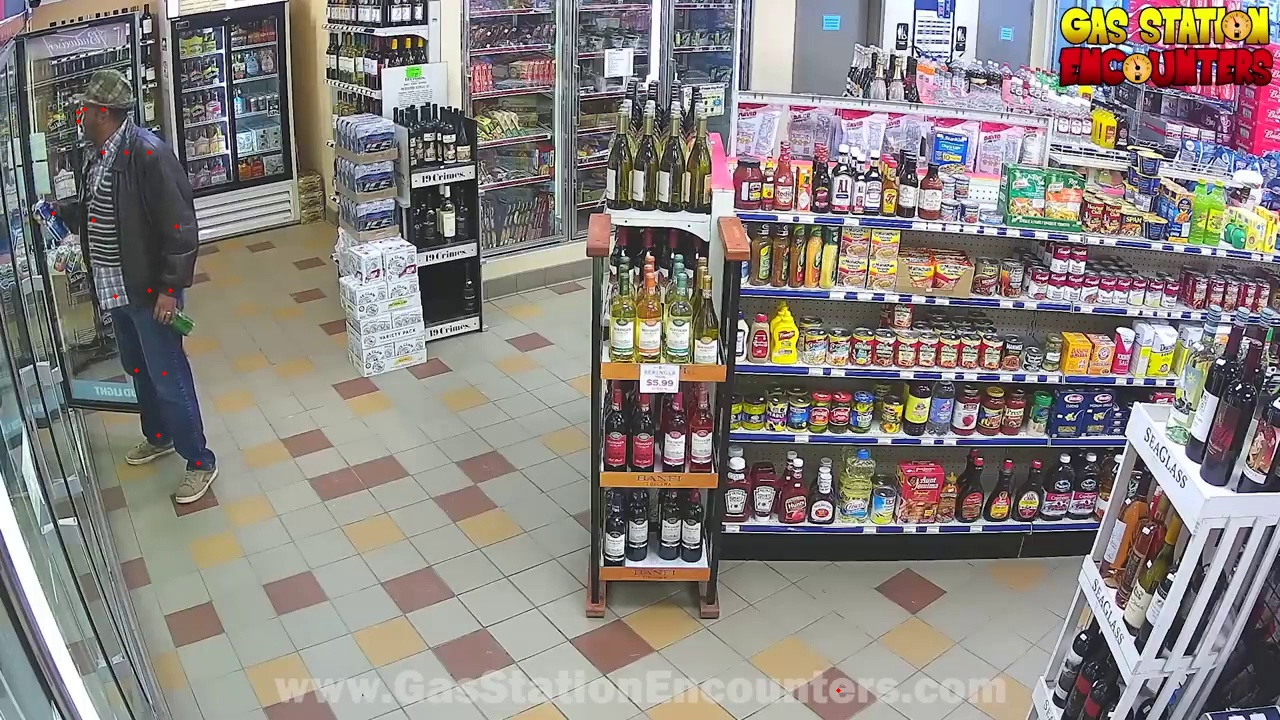

In [336]:
for pred in preds:
  cv2.circle(image, (int(pred[0]), int(pred[1])), 2, color= (0, 0, 255),thickness = -1);
cv2.imwrite('/content/asdad.jpg', image)

Image(filename='/content/asdad.jpg')

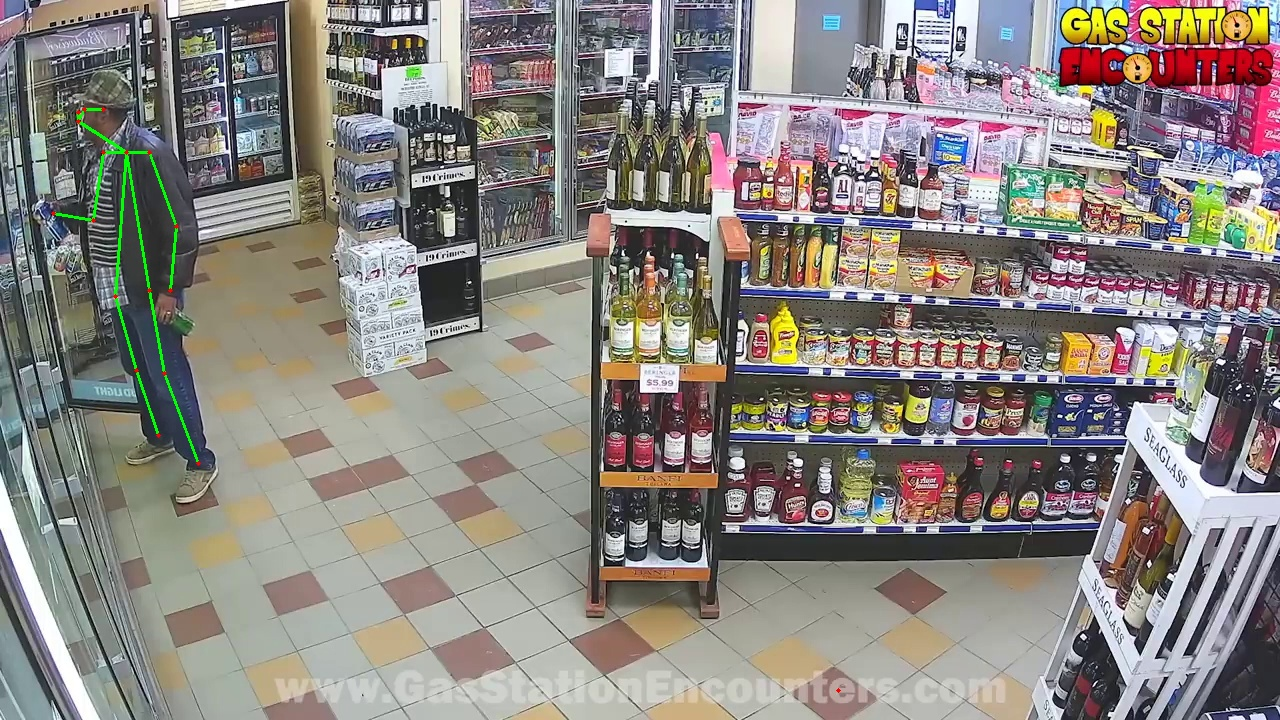

In [337]:
import cv2
from IPython.display import Image, clear_output 
image = cv2.imread(img_path)
skeleton = [[16,14],[14,12],[10,8],[8,6],
            [15,13],[13,11],[5,7],[9,7],
            [0,1],[0,2],[1,3],#[2,4],
            [5,17],[6,17],[0,17],[17,11],[12,17]]
for i,j in skeleton:
  cv2.line(image, (int(preds[i][0]), int(preds[i][1])), (int(preds[j][0]), int(preds[j][1])), (0,255,0), 2)
cv2.imwrite('/content/lines.jpg', image)

for pred in preds:
  cv2.circle(image, (int(pred[0]), int(pred[1])), 2, color= (0, 0, 255),thickness = -1);
cv2.imwrite('/content/lines.jpg', image)

Image(filename='/content/lines.jpg')
#cv2.line(image, (x1, y1), (x2, y2), (0,255,0), lineThickness)

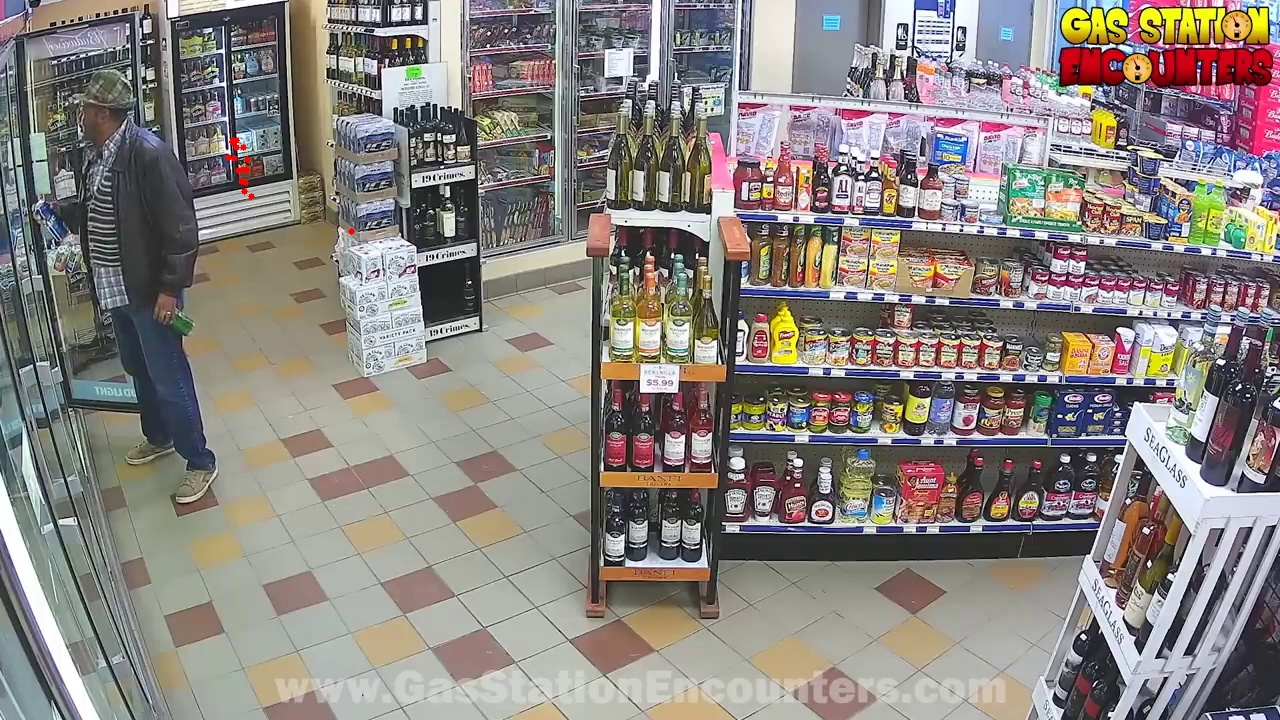